# Opdracht 4.1: ZTDL 1 - First Deep Learning Model
- Run First Deep Learning Model.iynb
- Verklaar de werking
    ▪ Neem het Jupyter Notebook over in een nieuw eigen Notebook
    ▪ Plaats commentaar bij code blokken zodat de werking van het programma op
        hoofdlijnen duidelijk wordt.

Dit hebben we gedaan door hieronder zo veel mogelijk te documenteren

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import make_circles

In [13]:
# Maakt 1000 circles die opgeslagen worden binnen X en de binaries van de cirkels in y
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [14]:
# Weergeeft gegeneerde cirkel punten
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [15]:
X.shape


(1000, 2)

Text(0.5, 1.0, 'Blue circles and Red crosses')

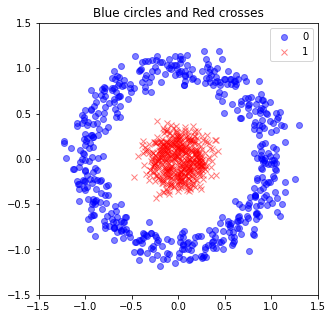

In [16]:
#Plot een grafiek waarin alle cirkels in X worden weergeven
#De range van deze grafiek is van -1.5 tot 1.5 in beide features van de grafiek.
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
# Creert het model voor neurale netwerk
model = Sequential()

In [19]:
# Voegt een layer toe aan het model. De layer is 4 dimensionaal en krijgt een 2D array binnen
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [20]:
model.add(Dense(1, activation='sigmoid'))


In [21]:
# Compileerd het model om te trainen, met een SGD optimezer die een learning rate van 0.5 heeft.
# Als deze groter is dan leert het model ook sneller. Maar het heeft meer computer kracht nodig.
# Binary crossentropy houdt in dat het elke keer een Yes/No moet beantwoorden.
# Laatste staat om op accuratie te rekenen.
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [22]:
# Voert het model 20 cycli uit.
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5140
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5990
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7200
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.8090
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8540
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8570
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8720
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8700
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8970
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9600
Epoch 11/20
32/32 [

In [23]:
# Past geoptimaliseerde dataset in nieuwe array.
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

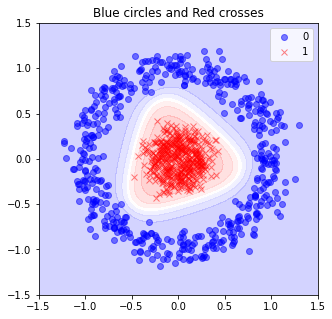

In [24]:
# Tekent de nieuwe geoptimaliseerde data set, waarin een edge wordt gemaakt tussen de rode kruizen en blauwe cirkels.
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")